<a href="https://colab.research.google.com/github/angel870326/NTU_Manufacturing_Data_Science/blob/main/MDS_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.10.22 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Manufacturing Data Science Assignment 2**


In [5]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##**1. (20%) 維度的詛咒**


###**(a) 試簡述何謂維度的詛咒？試列舉一案例說明。**


###**(b) 避免維度詛咒的方法有哪些？**

###**(c) 試找一個開放數據(e.g. Kaggle 開放數據或第一次作業紅酒數據集)並選一種方法(e.g. 線性迴歸或決策樹)，用模擬方法固定樣本數但逐步增加變數個數，試著重新繪製圖 3.12， 呈現維度與預測(或分類)績效間的關係。**

<img src="https://drive.google.com/uc?export=view&id=1K3qICNk176Oz_142S1pisefxD0Dy585O" width="500"/>

提示：模擬方法可思考如下：<br/>
(1) 先做線性迴歸<br/>
(2) 重要變數依 p-value 排序<br/>
(3) 將重要的變數一個個依序放入迴歸並計算 adjusted-R^2 作為預測準確度


以下以第一次作業的紅酒數據集做線性迴歸分析：

In [ ]:
data_furnace = pd.read_csv('/content/gdrive/MyDrive/碩二上/製造數據科學/Assignment/Assignment 1/Assignment1_Data/MDS_Assignment1_furnace.csv')
print(data_furnace.shape)
data_furnace.head()

(620, 29)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2


In [ ]:
furnace_x = data_furnace.drop('grade', axis= 1)
furnace_y = data_furnace['grade']

(1) 線性迴歸

In [ ]:
# ols
import statsmodels.api as sm
furnace_x = sm.add_constant(furnace_x) # add intercept
ols_result = sm.OLS(furnace_y, furnace_x).fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     21.52
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.16e-70
Time:                        01:19:40   Log-Likelihood:                -381.52
No. Observations:                 620   AIC:                             819.0
Df Residuals:                     592   BIC:                             943.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0339      0.018    110.528      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(2) 變數依 p-value 做排序

In [ ]:
# Sort variables by their p-values
ols_analysis = pd.concat([ols_result.pvalues], axis=1).iloc[1: , :]
ols_analysis.columns = ["p-value"]
ols_analysis_sorted = ols_analysis.drop(index=('f9')).sort_values(by=['p-value'])
sorted_variables = ols_analysis_sorted.index.values
sorted_variables

array(['f18', 'f2', 'f14', 'f15', 'f22', 'f17', 'f25', 'f6', 'f5', 'f8',
       'f10', 'f16', 'f26', 'f1', 'f11', 'f13', 'f21', 'f19', 'f7', 'f24',
       'f20', 'f3', 'f23', 'f27', 'f0', 'f4', 'f12'], dtype=object)

(3) 依變數重要性依序加入模型，計算 adjusted R-squared 做為預測準確度

In [ ]:
# OLS analysis with intercept
def ols_intercept(x):
  x_constant = sm.add_constant(x) # add intercept
  result = sm.OLS(furnace_y, x_constant).fit()
  return result

In [ ]:
# Stepwise regression - forward
current_x = data_furnace[[sorted_variables[0]]].copy()
stepwise_adjR = pd.DataFrame({'variable':[sorted_variables[0]], 'Adjusted R-squared':[ols_intercept(current_x).rsquared_adj], 'Dimension':[len(current_x.columns)]})

for i in range(1,len(sorted_variables)):
  current_x = pd.concat([current_x, data_furnace[[sorted_variables[i]]].copy()], axis=1)
  stepwise_adjR = stepwise_adjR.append(pd.DataFrame({'variable':[sorted_variables[i]], 'Adjusted R-squared':[ols_intercept(current_x).rsquared_adj], 'Dimension':[len(current_x.columns)]}), ignore_index=True)

stepwise_adjR

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variable,Adjusted R-squared,Dimension
0,f18,0.076833,1
1,f2,0.273334,2
2,f14,0.369897,3
3,f15,0.403183,4
4,f22,0.407855,5
5,f17,0.420016,6
6,f25,0.428536,7
7,f6,0.438536,8
8,f5,0.458080,9
9,f8,0.462652,10


*Note: Variable f9 is dropped since it has a constant value for all the observations.

In [ ]:
# Mandarin
from matplotlib.font_manager import FontProperties
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
font = 'TaipeiSansTCBeta-Regular.ttf'
fontP = FontProperties(fname='TaipeiSansTCBeta-Regular.ttf')

--2022-10-21 03:02:38--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.113, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gb633tjpn9bi6uis9vj62s45knf5ro7d/1666321350000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=4a72545c-454e-4b1a-bc94-4b80f67bf339 [following]
--2022-10-21 03:02:39--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gb633tjpn9bi6uis9vj62s45knf5ro7d/1666321350000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=4a72545c-454e-4b1a-bc94-4b80f67bf339
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to doc-0k-9o-d

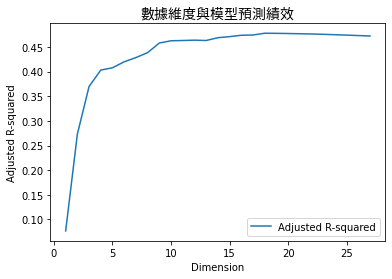

In [ ]:
# 數據維度與模型預測績效
stepwise_adjR_plot = stepwise_adjR.plot(x='Dimension', y='Adjusted R-squared')
# th_plot.set_ylim(top=0.5)
stepwise_adjR_plot.set_ylabel('Adjusted R-squared')
plt.title("數據維度與模型預測績效", fontproperties=fontP, fontsize=14)
plt.show()

由上圖可以看到：

*   維度在5以下時，模型準確率快速上升
*   維度達到18時，模型準確率達到最高
*   維度超過18以後，模型準確率逐漸下降，然而下降幅度不大

由此可推論，此資料集的維度數量尚未達到「維度的詛咒」的程度。




##**2. (20%)**

###**(a) 試找一個開放數據(e.g. Kaggle 開放數據)，您會用什麼方法來確認資料品質的好壞？試操作一次並說明其細節。**

**Kaggle Dataset: Video Game Sales**

Source: https://www.kaggle.com/datasets/gregorut/videogamesales



####**Step 1: Read the dataset and take an overview of it**

首先看一下資料集中有多少變數和觀察值，以及有哪些變數和其資料型態，確認所有變數都符合預期達到的目標，且容易解釋。

In [7]:
# Read dataset
data_vgsales = pd.read_csv('/content/gdrive/MyDrive/碩二上/製造數據科學/Assignment/Assignment 2/Assignment2_Data/vgsales.csv')
print(data_vgsales.shape)
data_vgsales.head()

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


####**Step 2: Check if there is NaN in each column**

檢查各個變數（欄位）是否有空值，以及空值佔整體資料（筆數）的比例，根據使用資料集的目的、變數的重要性決定如何處理空值問題。

由下方計算結果可以看到只有 `Year` 和 `Publisher` 有空值存在，且佔比約為 1.63% 及 0.34%，隨然仍有空值存在但佔比甚低，屬於可以接受的範圍，若所要做的研究不能接受空值存在，可以考慮刪除有空值存在的觀察值。




In [8]:
vgsales_nan = pd.DataFrame(data_vgsales.isnull().sum(), columns=['nan_count'])
vgsales_nan['nan_percent'] = vgsales_nan['nan_count'] / len(data_vgsales)
vgsales_nan

,nan_count,nan_percent
Rank,0,0.000000
Name,0,0.000000
Platform,0,0.000000
Year,271,0.016327
Genre,0,0.000000
Publisher,58,0.003494
NA_Sales,0,0.000000
EU_Sales,0,0.000000
JP_Sales,0,0.000000
Other_Sales,0,0.000000


####**Step 3: Modify data types if needed**

由於 `Year` 屬於<u>**非連續型變數**</u>，因此以下將 `Year` 改為類別型變數。

In [9]:
# Modify data types
data_vgsales["Year"] = data_vgsales["Year"].fillna(0).astype(int) # 先將空值補0，才能轉換資料型態
data_vgsales["Year"] = data_vgsales["Year"].astype(int).astype("category")
data_vgsales.dtypes

Rank               int64
Name              object
Platform          object
Year            category
Genre             object
Publisher         object
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
Global_Sales     float64
dtype: object

####**Step 4: Check if IDs are unique**

一般來說資料集會有 unique ID，例如：身分證字號、學號、使用者帳號等等，確認是否有重複的 ID，避免重複的資料降低後續研究的可信度。

在本資料集中，`Rank` 為不同平台遊戲的總銷售排名，由於資料量龐大，總銷量正好相同以至於排名相同的機率非常低，可以視為資料集中獨特且不可重複的 ID。


In [10]:
row_count = len(data_vgsales.index)
unique_rank_count = data_vgsales["Rank"].nunique()  # Count unique values in a single column
print("Number of unique Rank: ", row_count)
print("Number of unique Rank: ", unique_rank_count)

if (unique_rank_count == row_count):
  print("Ranks are unique.")
else:
  print("Ranks are NOT unique.")

Number of unique Rank:  16598
Number of unique Rank:  16598
Ranks are unique.


####**Step 5: Take an overview of each variable (column), and check if they are all correct**

**類別變數：**

*   各個變數有幾種類別 (unique)
*   各個變數出現次數最多的類別 (top) 以及出現幾次 (freq)

In [11]:
# Overview
data_vgsales.describe(exclude=[np.number])

,Name,Platform,Year,Genre,Publisher
count,16598,16598,16598,16598,16540
unique,11493,31,40,12,578
top,Need for Speed: Most Wanted,DS,2009,Action,Electronic Arts
freq,12,2163,1431,3316,1351


*   檢查各個變數的類別是否皆正確、筆數是否過度集中（以 Genre 為例）：

    由下方結果可以看到類別區分清楚，沒有需要再合併的情況，且資料沒有過度集中在少數幾個類別的問題。



,Count
Action,3316
Sports,2346
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867
Fighting,848


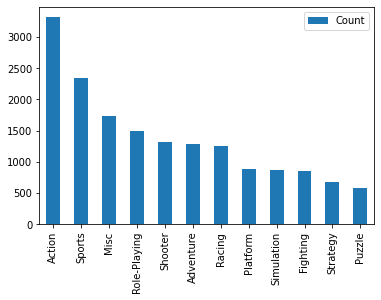

In [26]:
# Count
genre_count = data_vgsales["Genre"].value_counts().to_frame()
genre_count = genre_count.rename(columns={'Genre': 'Count'})
display(genre_count)
# Plot
genre_count.plot(kind='bar')
plt.show()

**數值變數：**

*   各個變數的數值分佈、最小值及最大值為多少
*   是否存在 outlier



In [27]:
# Overview
data_vgsales.describe(include=[np.number])

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


以 `JP_Sales` 為例，由下方圖中可以看到銷量大多集中在 1 million 以下，僅有零星少數超過此數值，需要根據研究目標去決定是否將這些觀察值視為 outlier，或是專門去研究這些 outlier 能有更多銷量的理由。此外，將此種數值變數依照四分位距等方式轉換為類別變數也是一種解決方法，但仍須根據研究目標去評估是否合適。

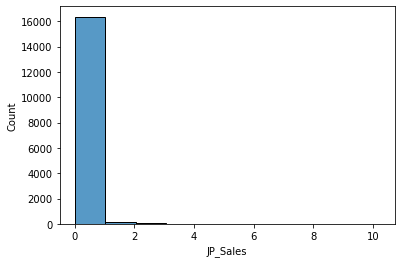

In [61]:
sns.histplot(data_vgsales["JP_Sales"], bins=10)
plt.show()

###**(b) 公司或您是否有現存方法來進行資料品質的確認？如果有(或沒有)，試依您的角度說明(或建議)確認資料品質的標準作業流程(i.e. SOP)。**

在確定將要進行的研究主題及目標後，可以依照下列步驟判斷資料集的品質是否良好：

1.   <u>**可用性 (Availability)**</u>：確認所有變數都符合預期達到的目標，且容易解釋 (e.g. 2(a) Step 1)
2.   <u>**完整性 (Completeness)**</u>：確認資料量（筆數）足夠 (e.g. 2(a) Step 1)、研究所需的變數皆存在且沒有缺失值 (e.g. 2(a) Step 2)、若有缺失值是否有適當的處理方式、資料格式是否良好 (e.g. 2(a) Step 3)
3.   <u>**唯一性 (Uniqueness)**</u>：確認每筆資料的 id 是否皆為 unique，沒有重複的資料 (e.g. 2(a) Step 4)
4.   <u>**準確性 (Accuracy)**</u>：檢查資料是否皆正確，例如資料中是否存在亂碼、年份是否超出現有年份、是否存在異常值等等 (e.g. 2(a) Step 5)

  *   <u>**類別變數 (categorical variable)**</u>：
      *   檢查各個變數的類別是否皆正確，是否有應歸屬同一類別者
      *   檢查各類別的筆數是否過度集中：barplot
     
  *   <u>**數值變數 (numerical variable)**</u>： 
      *   觀察資料分佈：如 scatter plot、四分位數和 boxplot
      *   確認變數之間是否互相獨立 (independence)，避免共線性 (Collinearity) 的問題：可以用 scatter plot、VIF 和 Durbin-Watson test 去判斷
      *   是否存在異常值 (outlier)：可以用 boxplot 和 cook's distance 去判斷




###**(c) 試建議三個可能衡量數據品質的量化指標(i.e. KPIs)。**




1.   <u>**Missing Value**</u>：<br/>
     不管是何種類型的變數皆可去計算缺失值的佔比，缺失值佔比愈高代表資料品質愈差。

2.   <u>**Cook's Distance**</u>：<br/>
     在線性迴歸中可以用來判斷是否存在異常值。當 Cook's distance > 0.5 就需要特別注意是否為異常值。

3.   <u>**VIF**</u>：<br/>
     在線性迴歸中可以判斷變數之間是否存在共線性問題（變數之間是否獨立）。當 VIF > 10，代表變數存在共線性，應刪除該變數。



##**3. (20%) 在數據科學分析架構中的決策支援階段**



###**(a) 什麼是模型的適應性與擴充性？**

###**(b) 在 AI 專案中(可根據第一題的開放數據與模型)，就您所使用的數據與建構的預測模型是否具備適用性與擴充性？為什麼？又該如何調整與改善呢？**

##**4. (10%) 遺漏值填補的方法包括了統計量填補、預測式填補與生成式填補**




###**(a) 試說明這些方法分別適用於什麼樣情形**

*   <u>**統計量填補 (statistics imputation)**</u>：<br/>
    包括填補最大值、最小值、中位數、平均數、眾數等，是最簡單的一種補值方式，可能會因為<u>**時間與資源有限**</u>而使用，但是此填補方法與其他變數毫無關聯，因此建議在<u>**遺漏值比例較少**</u>時使用，否則可能影響研究的可信度。

*   <u>**預測式填補 (predictive imputation)**</u>：<br/>
    包括「K最近鄰居填補法」(KNNI)、「反距離加權」(IDW)、「鏈式方程多重填補法」(MICE) 等方法，可以透過找出與其他欄位之間的關係，<u>**建立模型**</u>來預測出應填補的值，而非單純補上平均值。在<u>**不受時間與資源限制**</u>且<u>**有建模能力**</u>的情況下，建議使用此種補值方法。

*   <u>**生成式填補 (generative imputation)**</u>：<br/>
    主要的方法為「生成對抗填補網路」(GAIN)，使用單一模型填補，和預測式填補相比<u>**效率較高**</u>，然而因為是基於神經網路的模型，會有不少<u>**參數**</u>需要依照所使用的資料去做調整，因此需要<u>**對神經網路有一定的熟悉度**</u>才有辦法使用此種模型做預測補值。


###**(b) 為什麼某特徵存在大量遺漏值不宜直接刪除？**

1.   刪除整欄特徵可能會使我們<u>**失去大量有用的資訊**</u>，尤其當該特徵很有可能是影響研究結果的重要因素時。

2.   若屬於「<u>**系統性遺漏值**</u>」則可以將其轉換為遺漏值較少的資料格式。例如課堂中有舉了平行機台的例子（Lecture05 p.26），由於一個產品只會經過一個機台，造成各機台溫度欄位有大量空值存在，可以轉而將溫度記錄在同一個欄位，並新增一個機台ID的欄位來記錄該產品所經過的是哪一個機台，大幅減少遺漏值。

3.   有些模型及演算法可以接受<u>**在有空值的情況下訓練模型**</u>，因此可視後續所要使用的模型決定是否要補值。


##**5. (30%) 在 UCI Machine Learning Repository 開放數據中包含了一個鋼板缺陷數據([steel plates faults dataset](https://archive.ics.uci.edu/ml/datasets/steel+plates+faults)，一共包含了 1,941 個觀測值，而每個觀測值具有 27 個特徵以及作為目標值的 7 種缺陷。試挑選出凹凸不平(Bumps)以及刮痕(K_Scratch)兩種缺陷進行分析。試著參考網路資源學習並撰寫程式，使用此數據回答下列問題。**




In [ ]:
colNames = pd.read_excel('/content/gdrive/MyDrive/碩二上/製造數據科學/Assignment/Assignment 2/Assignment2_Data/MDS_Assignment2_Steelplates.xlsx', sheet_name = 0, header = None, names = ['colNames'])
data_spFaults = pd.read_excel('/content/gdrive/MyDrive/碩二上/製造數據科學/Assignment/Assignment 2/Assignment2_Data/MDS_Assignment2_Steelplates.xlsx', sheet_name = 1, header=None, names = colNames['colNames'])
print(data_spFaults.shape)
data_spFaults.head()

(1941, 34)


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [ ]:
spFaults_x = data_spFaults.iloc[:,0:-7]
spFaults_bumps = data_spFaults[['Bumps']].copy()
spFaults_kscatch = data_spFaults[['K_Scatch']].copy()
print("x: ", spFaults_x.shape)
print("Bumps: ", spFaults_bumps.shape)
print("K_Scatch: ", spFaults_kscatch.shape)

x:  (1941, 27)
Bumps:  (1941, 1)
K_Scatch:  (1941, 1)


In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_bumps, y_test_bumps, y_train_kscatch, y_test_kscatch = train_test_split(spFaults_x, spFaults_bumps, spFaults_kscatch, test_size = 0.20, random_state = 42)

In [ ]:
# Standardize training and test sets
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

###**(1) 試將羅吉斯迴歸分析的結果呈現如下表，並試著解釋任一特徵與目標值之間的關係。**

<img src="https://drive.google.com/uc?export=view&id=1u9lH1lX2ohYkYORGgUWZ6S08umMfKjqH" width="500"/>


In [ ]:
# Logistic regression
import statsmodels.api as sm
def logistic_regression(y):
  x_train_intercept = sm.add_constant(x_train) # add intercept
  logit_result = sm.Logit(y, x_train_intercept).fit()
  print(logit_result.summary())
  return logit_result

In [ ]:
# 消除科學記號
from IPython.display import display
pd.set_option('display.float_format', lambda x: '%.6f' % x) 

In [ ]:
# Results
def logistic_analysis(logit_result):
  logit_analysis = pd.concat([logit_result.params, logit_result.bse, logit_result.tvalues, logit_result.pvalues], axis=1)
  logit_analysis.columns = ["estimate", "std. error", "t value", "p-value"]
  logit_analysis.rename(index={'const': 'intercept'}, inplace=True)
  return logit_analysis
  # print("R-squared: ", round(logit_result.prsquared,4), ", Adjusted R-squared: ", round(logit_result.arsquared,4))

#### **Bumps**

In [ ]:
logit_result_bumps = logistic_regression(y_train_bumps)
logit_analysis_bumps = logistic_analysis(logit_result_bumps)
logit_analysis_bumps

Optimization terminated successfully.
         Current function value: 0.368798
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Bumps   No. Observations:                 1552
Model:                          Logit   Df Residuals:                     1525
Method:                           MLE   Df Model:                           26
Date:                Fri, 21 Oct 2022   Pseudo R-squ.:                  0.2872
Time:                        16:37:11   Log-Likelihood:                -572.37
converged:                       True   LL-Null:                       -803.03
Covariance Type:            nonrobust   LLR p-value:                 3.341e-81
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -12.5365   6.42e+06  -1.95e-06      1.000   -1.26e+07    1.26

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


,estimate,std. error,t value,p-value
intercept,-12.536545,6424477.627045,-0.000002,0.999998
X_Minimum,0.038612,0.050725,0.761210,0.446531
X_Maximum,-0.038091,0.050728,-0.750879,0.452726
Y_Minimum,0.115358,0.024197,4.767467,0.000002
Y_Maximum,-0.115358,0.024197,-4.767463,0.000002
Pixels_Areas,-0.002226,0.001631,-1.364698,0.172348
X_Perimeter,-0.033207,0.011851,-2.802158,0.005076
Y_Perimeter,0.089786,0.022032,4.075320,0.000046
Sum_of_Luminosity,0.000016,0.000015,1.078243,0.280925
Minimum_of_Luminosity,0.014473,0.010624,1.362262,0.173115


#### **K_Scatch**

In [ ]:
logit_result_kscatch = logistic_regression(y_train_kscatch)
logit_analysis_kscatch = logistic_analysis(logit_result_kscatch)
logit_analysis_kscatch

Optimization terminated successfully.
         Current function value: 0.055499
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:               K_Scatch   No. Observations:                 1552
Model:                          Logit   Df Residuals:                     1525
Method:                           MLE   Df Model:                           26
Date:                Fri, 21 Oct 2022   Pseudo R-squ.:                  0.8886
Time:                        16:38:46   Log-Likelihood:                -86.134
converged:                       True   LL-Null:                       -773.29
Covariance Type:            nonrobust   LLR p-value:                8.824e-274
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.7464   9.95e+06   1.28e-06      1.000   -1.95e+07    1.95

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,estimate,std. error,t value,p-value
intercept,12.746380,9952289.533735,0.000001,0.999999
X_Minimum,-0.056617,0.061260,-0.924212,0.355376
X_Maximum,0.055259,0.061306,0.901351,0.367401
Y_Minimum,-0.022881,0.014203,-1.611031,0.107173
Y_Maximum,0.022881,0.014203,1.611019,0.107176
Pixels_Areas,0.000782,0.000800,0.976811,0.328663
X_Perimeter,0.027585,0.008439,3.268765,0.001080
Y_Perimeter,-0.040211,0.018041,-2.228906,0.025820
Sum_of_Luminosity,-0.000008,0.000008,-0.985934,0.324165
Minimum_of_Luminosity,-0.033425,0.015734,-2.124399,0.033637


###**(2) 基於上述(a)的結果，將上述特徵以 t value 進行排序後，哪些特徵的迴歸係數在統計上是顯著的呢(p-value<0.01)?**

#### **Bumps**

In [ ]:
# Sort variables by their p-values
logit_analysis_bumps_sorted = logit_analysis_bumps.sort_values(by=['t value'])
logit_analysis_bumps_sorted

,estimate,std. error,t value,p-value
Y_Maximum,-0.115358,0.024197,-4.767463,0.000002
Steel_Plate_Thickness,-0.005131,0.001744,-2.942541,0.003255
X_Perimeter,-0.033207,0.011851,-2.802158,0.005076
Luminosity_Index,-5.610580,2.608671,-2.150743,0.031497
Edges_X_Index,-1.734007,0.813520,-2.131486,0.033049
Pixels_Areas,-0.002226,0.001631,-1.364698,0.172348
SigmoidOfAreas,-0.962575,0.839839,-1.146142,0.251737
Orientation_Index,-1.190398,1.258560,-0.945842,0.344229
Empty_Index,-2.640145,3.324212,-0.794217,0.427069
X_Maximum,-0.038091,0.050728,-0.750879,0.452726


In [ ]:
# Variables with p-value < 0.01
print("Statistically significant variables with p-values < 0.01: ")
logit_analysis_bumps_sorted.index[logit_analysis_bumps_sorted['p-value'] < 0.01].tolist()

Statistically significant variables with p-values < 0.01: 


['Y_Maximum',
 'Steel_Plate_Thickness',
 'X_Perimeter',
 'Y_Perimeter',
 'Y_Minimum',
 'Edges_Y_Index',
 'Edges_Index']

#### **K_scatch**

In [ ]:
# Sort variables by their p-values
logit_analysis_kscatch_sorted = logit_analysis_kscatch.sort_values(by=['t value'])
logit_analysis_kscatch_sorted

,estimate,std. error,t value,p-value
Orientation_Index,-9.307992,2.540634,-3.663649,0.000249
Empty_Index,-14.583272,5.722510,-2.548405,0.010822
Edges_Index,-2.720441,1.077456,-2.524875,0.011574
Steel_Plate_Thickness,-0.241142,0.096681,-2.494199,0.012624
Y_Perimeter,-0.040211,0.018041,-2.228906,0.025820
Minimum_of_Luminosity,-0.033425,0.015734,-2.124399,0.033637
Edges_Y_Index,-5.824240,2.833912,-2.055194,0.039860
Y_Minimum,-0.022881,0.014203,-1.611031,0.107173
Log_X_Index,-7.248725,6.567692,-1.103694,0.269726
Outside_X_Index,-85.225965,83.308819,-1.023013,0.306302


In [ ]:
# Variables with p-value < 0.01
print("Statistically significant variables with p-values < 0.01: ")
logit_analysis_kscatch_sorted.index[logit_analysis_kscatch_sorted['p-value'] < 0.01].tolist()

Statistically significant variables with p-values < 0.01: 


['Orientation_Index',
 'Log_Y_Index',
 'Luminosity_Index',
 'X_Perimeter',
 'Edges_X_Index']

###**(3) 試問配適一個「羅吉斯迴歸模型」是否合適？試若配適不佳，試說明其可能的原因為何？**

In [ ]:
# Model performance: Confusion matrix & accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

def confusion_matrix_accuracy(cm, y_test, prediction):
  # confusion matrix
  cm_plot = sns.heatmap(cm, annot=True, fmt='.20g', cmap='Blues')
  cm_plot.set_title('Confusion Matrix\n')
  cm_plot.set_xlabel('\nPredicted Values')
  cm_plot.set_ylabel('Actual Values ')
  cm_plot.xaxis.set_ticklabels(['False','True'])
  cm_plot.yaxis.set_ticklabels(['False','True'])
  plt.show()
  # accuracy score of the model
  print('Test accuracy = ', accuracy_score(y_test, prediction))

####**Bumps**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


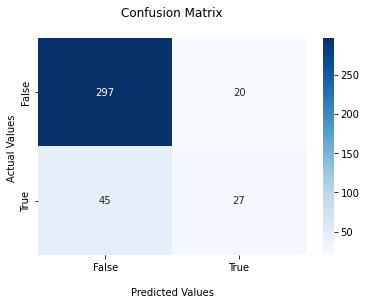

Test accuracy =  0.8329048843187661


In [ ]:
# Prediction
y_pred_bumps = logit_result_bumps.predict(sm.add_constant(x_test))
prediction_bumps = list(map(round, y_pred_bumps))

# Evaluation
cm_bumps = confusion_matrix(y_test_bumps, prediction_bumps)
confusion_matrix_accuracy(cm_bumps, y_test_bumps, prediction_bumps)  

####**K-scatch**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


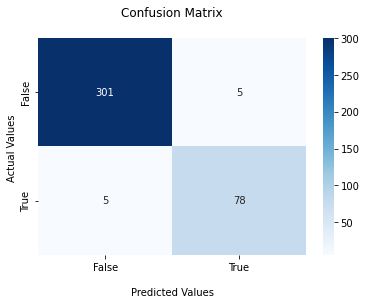

Test accuracy =  0.974293059125964


In [ ]:
# Prediction
y_pred_kscatch = logit_result_kscatch.predict(sm.add_constant(x_test))
prediction_kscatch = list(map(round, y_pred_kscatch))

# Evaluation
cm_kscatch = confusion_matrix(y_test_kscatch, prediction_kscatch)
confusion_matrix_accuracy(cm_kscatch, y_test_kscatch, prediction_kscatch)  

###**(4) 試問配適一個「線性判別分析模型」是否合適？若配適不佳，試說明其可能的原因為何？**

In [ ]:
# Linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

####**Bumps**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


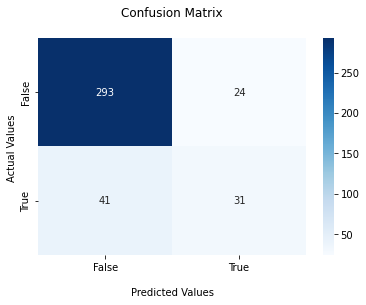

Test accuracy =  0.8329048843187661


In [ ]:
# Training
LDA_model_bumps = LinearDiscriminantAnalysis().fit(x_train, y_train_bumps)

# Prediction
y_pred_bumps_LDA = LDA_model_bumps.predict(x_test)
prediction_bumps_LDA = list(map(round, y_pred_bumps_LDA))

# Evaluation
cm_bumps_LDA = confusion_matrix(y_test_bumps, prediction_bumps_LDA)
confusion_matrix_accuracy(cm_bumps_LDA, y_test_bumps, prediction_bumps_LDA)  

####**K-scatch**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


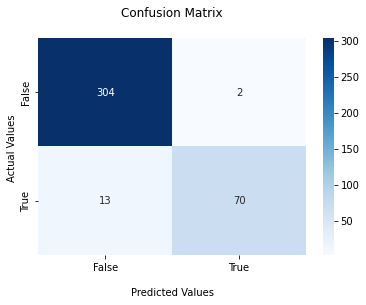

Test accuracy =  0.961439588688946


In [ ]:
# Training
LDA_model_kscatch = LinearDiscriminantAnalysis().fit(x_train, y_train_kscatch)

# Prediction
y_pred_kscatch_LDA = LDA_model_kscatch.predict(x_test)
prediction_kscatch_LDA = list(map(round, y_pred_kscatch_LDA))

# Evaluation
cm_kscatch_LDA = confusion_matrix(y_test_kscatch, prediction_kscatch_LDA)
confusion_matrix_accuracy(cm_kscatch_LDA, y_test_kscatch, prediction_kscatch_LDA)  

###**(5) 試問配適一個「二次判別分析模型」是否合適？若配適不佳，試說明其可能的原因為何？**

In [ ]:
# Quadratic discriminant analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

####**Bumps**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


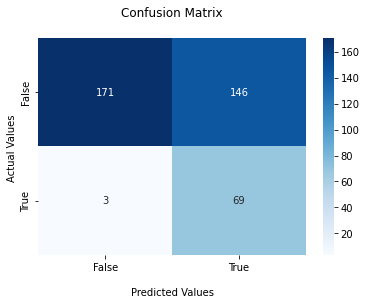

Test accuracy =  0.6169665809768637


In [ ]:
# Training
QDA_model_bumps = QuadraticDiscriminantAnalysis().fit(x_train, y_train_bumps)

# Prediction
y_pred_bumps_QDA = QDA_model_bumps.predict(x_test)
prediction_bumps_QDA = list(map(round, y_pred_bumps_QDA))

# Evaluation
cm_bumps_QDA = confusion_matrix(y_test_bumps, prediction_bumps_QDA)
confusion_matrix_accuracy(cm_bumps_QDA, y_test_bumps, prediction_bumps_QDA)  

####**K-scatch**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


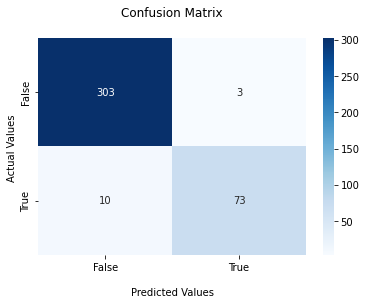

Test accuracy =  0.9665809768637532


In [ ]:
# Training
QDA_model_kscatch = QuadraticDiscriminantAnalysis().fit(x_train, y_train_kscatch)

# Prediction
y_pred_kscatch_QDA = QDA_model_kscatch.predict(x_test)
prediction_kscatch_QDA = list(map(round, y_pred_kscatch_QDA))

# Evaluation
cm_kscatch_QDA = confusion_matrix(y_test_kscatch, prediction_kscatch_QDA)
confusion_matrix_accuracy(cm_kscatch_QDA, y_test_kscatch, prediction_kscatch_QDA)  